# Student Number: 19013880
# The Final Assignment - Infinte Square Well and Infinite Unsquare Well

*From here till the end of section 1.1 is pasted from the notebook of student 19013880's Jupyter Notebook which is titled  '19013880 - Finding the ground state energy'* [8]

In [18]:
#for interactive plots: 
%matplotlib notebook

#import modules:
import numpy as np
import matplotlib.pyplot as plt

We can find the boundary conditions of the infinite square well, analytically. The energy and wavefunction of an electron that can reside in the well is given by the one-dimensional time-independent Schrodinger equation (TISE):

$$
-\frac{\hbar^2}{2m} \frac{d^2\psi}{dx^2} + V(x)\psi(x) = E\psi(x) \ \ (1) \ \ \ \text{as seen in} \ \ [2], [7]
$$

 where $V(x)$ is the potential of the electron, $\psi$ is the wavefunction of the electron, $\hbar$ is the reduced Plank's constant, $m$ is the mass of the electron, $x$ is the 1D position and $E$ is the energy of the electron. Solutions to this equation are energy $E$ of the electron and wavefunction $\psi$ of the electron.
 
First, lets code the constants:

In [19]:
m = 9.109383702*(1e-31) #mass of electron in kg
e = 1.602176634*(1e-19) #charge of electron in C
h_bar = 1.054571817*(1e-34) #reduced Plank's constant in Js
a_value = 5*(1e-11) #one boundary of infinite square well... width = 2a in m

b=a_value #x-position of the upper boundary of the infinte square well
a=-a_value #x-position of the lower boundary of the infinite square well

# Section 1: Infinite Square Well

In an infinite square well, $V(x)$ is defined as:

$$ V_x = \begin{cases} 0 & \text{if } -a \leq x \leq +a, \\ 
\infty  & \text{if } |x| > a, \end{cases} \ \ (2) \ \ \ \text{as seen in} \ \ [2], [7]
$$

However, from $-a$ to $a$ the potential is 0. Since, no electron can reside outside the well (i.e. wavefunction is 0 outside well), we can focus on coding the potential inside the well only. The potential inside the well is 0 in this case:

In [20]:
def V(x):
    '''
    Potential function
    Inputs: x
    Returns: 0.0 for all inputs x
    
    '''
    return 0.0

Solving the TISE, gives 2 differential equations:

$$
\frac{d \psi}{dx } = \phi, \ \ (3) \ \ \ \text{as seen in} \ \ [2], [7]\\
\frac{d \phi}{dx } = \frac{2m}{\hbar^2} \left[V(x) - E \right] \psi(x),  \ \ (4) \ \ \ \text{as seen in} \ \ [2], [7]
$$

where $\phi$ is the eigenvalue. The differential can be solved numerically, using the 4th order Runge-Kutta function, to give $E$ at the boundary $x=a$ Define the two differential equations:

In [21]:
def schrodinger(r, x, E):
    '''Schrodinger differential equations
    Inputs: r (vector of psi and phi), x (1D position), E (energy)
    Outputs: [d_psi,d_phi] (both differential equations in an array)
    '''
    
    #psi and phi will be a vector r:
    psi = r[0] #psi is the first element 
    phi = r[1] #phi is second
    
    #the differential equations:
    d_psi = phi
    d_phi = ((2*m)/h_bar**2)*(V(x)-E)*psi
    
    return np.array([d_psi,d_phi]) #return as an array of the differential equations


We will now define an a array of $x$ values:

In [22]:
xstart = a #starting boundary       
xend = b    #ending boundary       
N = 1000   #number of x points           
h = (xend - xstart)/N #size of each x point

xpoints = np.arange(xstart, xend, h) #make x points into an array

## 1.1: Finding the ground state energy

Using the 4th order Runge-Kutta function, we can numerically solve the differential equations shown above. We will first define an initial $\mathbf r$ and iterate using the Runge-Kutta function and the function that defines the differential equations (`schrodinger`):

In [23]:
#The follwing code is pasted from 10th code cell of 'PHAS0029 Session 8 Finding roots, and boundary value problems', Author: Louise Dash louise.dash@ucl.ac.uk
#[1]

def RungeKutta2d(xpoints, E):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: xpoints: array of x values, E: energy
    Outputs: [psi_points, phi_points]: solutions for psi(x) and phi(x), numpy arrays one longer than xpoints'''
    
    initial_psi = 0.0 
    initial_phi = 1.0
    r = np.array([initial_psi,initial_phi]) #array of initial r

    
    psi_points = [] #initialise empty arrays
    phi_points = []
    
    for x in xpoints: #loops over all xpoints up to (xend-h)
        psi_points.append(r[0])
        phi_points.append(r[1])

        k1 = h*schrodinger(r, x, E) 
        k2 = h*schrodinger(r+0.5*k1, x+0.5*h, E)
        k3 = h*schrodinger(r+0.5*k2, x+0.5*h, E)
        k4 = h*schrodinger(r+k3, x+h, E)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    
    # these next two lines calculate for the point at x = xend!
    psi_points.append(r[0])
    phi_points.append(r[1])

    
    return np.array([psi_points]) #only need psi values


#### Explanation for choice of inital condition for $\phi$: 

You can choose any value above 0. It must be above 0 because, otherwise, the Runge-Kutta function will output an array of virtually all `nan` values. `nan` stands for 'not a number'. This is usually when the output is a value divided by 0. 

Use the Secant method to find the energy value that leads to $\psi(x) = 0$ at $x=a$. First, guess two values for $E$ and find the corresponding wavefunctions (represented by Runge-Kutta). Then use a while loop to perform the Secant method:


In [24]:
#The follwing code is pasted from 11th code cell of 'PHAS0029 Session 8 Finding roots, and boundary value problems', Author: Louise Dash louise.dash@ucl.ac.uk
#[1]

#Initial Conditions (close to ground-state energy in J):
E1 = 0.0    # guess 1 of initial E1 (J)
E2 = e      # guess 2 of initial E2 (J) 

wf1 = RungeKutta2d(xpoints, E1)[0,N]
wf2 = RungeKutta2d(xpoints, E2)[0,N]

tolerance = e/1000 # set the tolerance for convergence

#Iterate Secant method:
while abs(E2-E1) > tolerance: 
    E3 = E2 - wf2*(E2-E1)/(wf2-wf1)  #Secant method equation
    
    #update initial energies for the next iteration:
    E1 = E2 
    E2 = E3 
    
    # and recalculate wavefunctions:
    wf1 = RungeKutta2d(xpoints, E1)[0,N]
    wf2 = RungeKutta2d(xpoints, E2)[0,N]
    
    print("...difference between E1,E2 is", abs(E2-E1), "\tCondition met?", abs(E2-E1) < tolerance) 

print() #space
print("The energy needs to be", E3/e, "eV") #divide by e to convert from J to eV

...difference between E1,E2 is 3.550738126956973e-18 	Condition met? False
...difference between E1,E2 is 1.2815251256815889e-18 	Condition met? False
...difference between E1,E2 is 7.959729129154386e-19 	Condition met? False
...difference between E1,E2 is 2.0858055385155895e-19 	Condition met? False
...difference between E1,E2 is 2.6836689494863816e-20 	Condition met? False
...difference between E1,E2 is 7.93588897073721e-22 	Condition met? False
...difference between E1,E2 is 2.7330653648344004e-24 	Condition met? True

The energy needs to be 37.60301621189953 eV


To find the analytical solution to the energy at $\psi(x) = 0$ at $x=a$, we use the equation:

$$
E_n = \frac{\pi^2 \hbar^2 n^2}{2m (2a)^2} \ \ (5) \ \ \ \text{as seen in} \ \ [2], [7]
$$

In [25]:
n=1 #define n 
En = (np.pi**2)*(n**2)*(h_bar**2)/(2*m*((2*a)**2)) #equation (5)

print("The analytically solved energy is", En/e, "eV")
print("The difference between the analytically solved ground state energy and numerically solved ground state energy is", np.abs(E3/e - En/e), "eV.")

The analytically solved energy is 37.60301621352959 eV
The difference between the analytically solved ground state energy and numerically solved ground state energy is 1.6300631955346034e-09 eV.


#### Comparison betwen analytically and numerically solved energies:

We can see that the energies are extremely similar. There is very small difference (as seen above). This shows that our numerical method for calculating the energy solution to the TISE for an infinite square well potential is very accurate (at least for ground state energy). 

## 1.2: Finding the ground state wavefunction


### Plot ground state wavefunction:

<IPython.core.display.Javascript object>


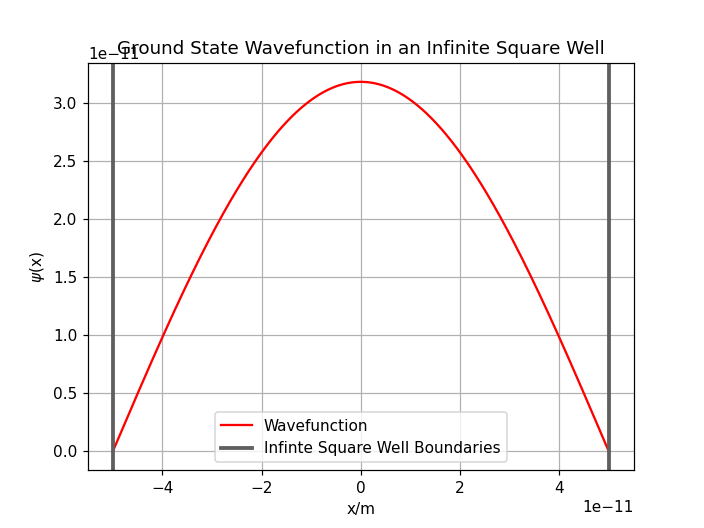

In [26]:
xplotpoints = np.arange(xstart, xend+h, h)#same array as xpoints but includes end point 

fig = plt.figure()
plt.plot(xplotpoints, RungeKutta2d(xpoints, E3)[0], color='r', label="Wavefunction") #the RungeKutta2d function is the wavefunction(psi values)

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label="Infinte Square Well Boundaries")
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels:
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.title('Ground State Wavefunction in an Infinite Square Well')
plt.grid()
plt.legend(loc="best")

plt.show()

### Normalisation:

The wavefunction above is not, yet, normalised. When normalised, the wavefunction $\psi(x)$ will be such that:

$$
\int_{-\infty}^{\infty} | \psi(x) |^2 {\rm d} x = 1    \ \ \ (6) \ \ \ \text{as seen in} \ \ [2], [7]
$$

To normalise, we must calculate the left hand side of the above function. Then divide our 'pre-normalised' wavefunction by the square root of this integral. To calculate the integral we can use the trapezoidal rule:

$$
I(a,b) = h \left[ \frac{1}{2}f(a) + \frac{1}{2}f(b) +
      \sum_{k=1}^{n-1}f(x + kh) \right]   \ \ (7) \ \ \ \text{as seen in} \ \ [2], [7]
$$

for limits a and b. For conveniance, we will code a function that will normalise any input wavefunction using this method:

In [27]:
def norm(wavefunction):
    '''A function that normalises a given wavefunction
    Input: wavefunction
    Output: norm_wf (normalised wavefunction)
    '''
    #square the wavefunction as shown in the integral above (equation 6):
    wf_squared = wavefunction[0]**2    
    
    #integral using trapezoidal rule:
    I = h*(0.5*wf_squared[0] + 0.5*wf_squared[-1] + np.sum(wf_squared[1:-1])) #equation 7
    
    
    #normalise by dividing the wavefunction by the square root of the integral:
    norm_wf = wavefunction[0]/np.sqrt(I) 

    return norm_wf


Plot the normalised wavefunction:

<IPython.core.display.Javascript object>


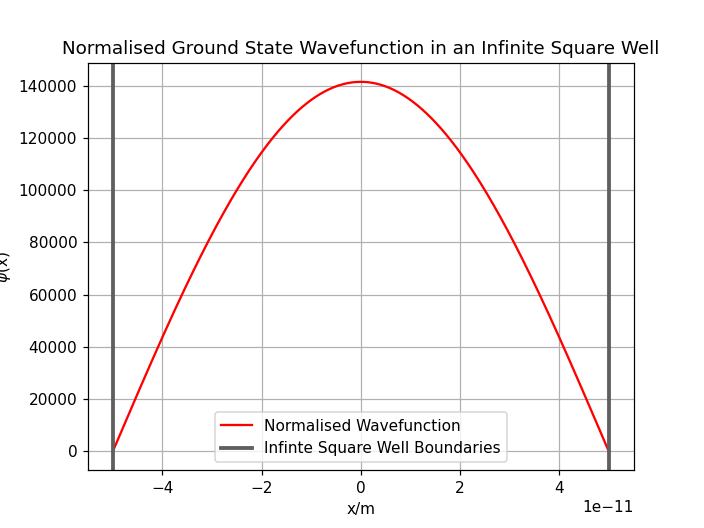

In [28]:
fig = plt.figure()
#wavefunction inputted into normalisation function then plot:
plt.plot(xplotpoints, norm(RungeKutta2d(xpoints, E3)), color='r', label="Normalised Wavefunction") 

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label="Infinte Square Well Boundaries")
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels:
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.title('Normalised Ground State Wavefunction in an Infinite Square Well')
plt.grid()
plt.legend(loc="best")

plt.show()


### Plotting the Analytical Solution:

The analytical normalised wavefunction is given by:

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
n \ \mathrm{odd} \ \ (8) \ \ \ \text{as seen in} \ \  [2], [7]
    $$

$$
\psi_n(x)  = \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad
    n \ \mathrm{even}.  \ \ (9) \ \ \ \text{as seen in} \ \  [2], [7]
$$

where n is the number of the energy level/state. We will define the analytical wavefunction as a function:

In [29]:
def analytic_wf(n,x):
    '''Analytical Wavefunction for a given energy state
    Input: n (energy state), x (range of x values for the wavefunction)
    Output: wf (analytical wavefunction)
    '''
    
    if (n%2) == 0: #if even
        wf = (1/np.sqrt(a_value))*np.sin((n*np.pi*x)/(2*a_value))
    else: #if odd
        wf = (1/np.sqrt(a_value))*np.cos((n*np.pi*x)/(2*a_value))
        
    return wf

Plot both analytical and numerical solutions to the Schrodinger equation (ground state wavefunctions in this case) on the same plot:

<IPython.core.display.Javascript object>


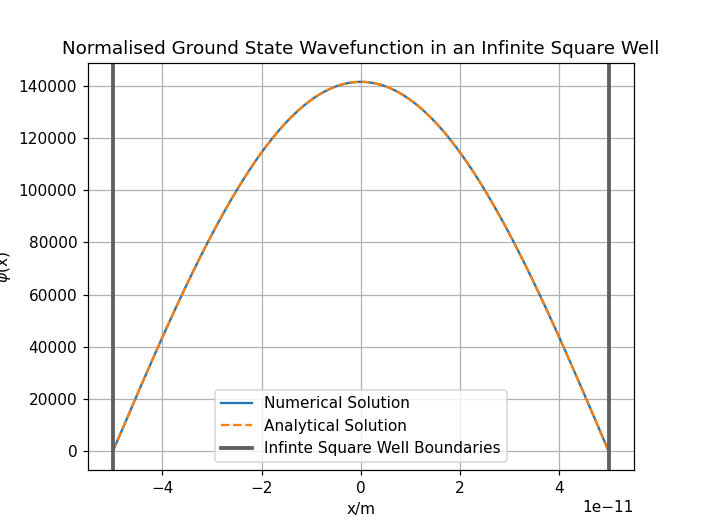

In [30]:
fig = plt.figure()

#Plots:
plt.plot(xplotpoints, norm(RungeKutta2d(xpoints, E3)), label='Numerical Solution') #ground state numerical plot (from before)
plt.plot(xpoints, analytic_wf(1,xpoints),'--', label='Analytical Solution') #ground state analytical plot
#Note: I plotted the analytical wavefunction as dashed line and the numerical wavefunction 
#as a line, in order to observe the difference between the two plots. 

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label="Infinte Square Well Boundaries")
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels:
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.title('Normalised Ground State Wavefunction in an Infinite Square Well')
plt.legend(loc='best')
plt.grid()

plt.show()

#### Discussion:
As you can see, the numerical solutions mathces the analytical solution perfectly. Therefore, with confidence, we can say that the numerical method implemented is extremeley accurate (at least for the ground state).

## 1.3: Finding the Higher Energy States

We will now find the wavefunctions of the first several excited states (n = 2,3,4) of an electron in the infinite square well. We will then find the corresponding analytical solutions to verify that the numerical solutions are correct. We will first have to find a method of choosing initital guesses for the energies and then outputting the numerically obtained energy (`E3`). So, we need a function that takes in inital guesses for the energies(`E1` and `E2`) and outputs `E3`. We will call this function `energy`.

Note that in order to call this function for any potential, we must redefine the `schrodinger` function (function that calculates the differential equations for each energy state) and `RungeKutta2` function (function that calculates the wavefunction for each energy state) to input any potential `potential`. I also included an input for the potential in the `energy` function:

In [31]:
#redefine `schrodinger` function to include a potential input (potential):
def schrodinger(r, x, E, potential):
    '''Schrodinger differential equations
    Inputs: r (vector of psi and phi), x (1D position), E (energy), potential
    Outputs: [d_psi,d_phi] (both differential equations in an array)
    '''
    
    #psi and phi will be a vector r:
    psi = r[0] #psi is the first element 
    phi = r[1] #phi is second
    
    #the differential equations:
    d_psi = phi
    d_phi = ((2*m)/h_bar**2)*(potential(x)-E)*psi
    
    return np.array([d_psi,d_phi]) #return as an array of the differential equations

In [32]:
#The follwing code is pasted from 10th code cell of 'PHAS0029 Session 8 Finding roots, and boundary value problems', Author: Louise Dash louise.dash@ucl.ac.uk
#[1]

#redefine `RungeKutta2d` function to include a potential input (potential):
def RungeKutta2d(xpoints, E, potential):
    '''Fourth-order Runge-Kutta rewritten for two simultaneous equations
    Inputs: xpoints: array of x values, E: energy, potential
    Outputs: [psi_points, phi_points]: solutions for psi(x) and phi(x), numpy arrays one longer than xpoints'''
    
    initial_psi = 0.0 
    initial_phi = 1.0
    r = np.array([initial_psi,initial_phi]) #array of initial r

    
    psi_points = [] #initialise empty arrays
    phi_points = []
    
    for x in xpoints: #loops over all xpoints up to (xend-h)
        psi_points.append(r[0])
        phi_points.append(r[1])

        k1 = h*schrodinger(r, x, E, potential) 
        k2 = h*schrodinger(r+0.5*k1, x+0.5*h, E, potential)
        k3 = h*schrodinger(r+0.5*k2, x+0.5*h, E, potential)
        k4 = h*schrodinger(r+k3, x+h, E, potential)
        r = r + (k1 + 2*k2 + 2*k3 + k4)/6
    
    # these next two lines calculate for the point at x = xend!
    psi_points.append(r[0])
    phi_points.append(r[1])

    
    return np.array([psi_points]) #only need psi values


So, we now have redifined the `schrodinger` and `RungeKutta2d` functions to include an input for the potential. We now will define the `energy` function (which was mentioned earlier):

In [33]:
def energy(E1, E2, potential):
    '''Energy of electron within a potential in an infinte well calculated using 'Secant Method' in units of J
    Input: E1 (1st guess of the energy), E2 (2nd guess of the energy), potential
    Output: E3 (energy of electron; one of the solutions to the TISE)
    '''
    #This is the same method for calculating E3 as we have seen before [1]:
    
    #Initial Conditions:
    wf1 = RungeKutta2d(xpoints, E1, potential)[0,N]
    wf2 = RungeKutta2d(xpoints, E2, potential)[0,N]
    
    tolerance = e/1000 # set the tolerance for convergence
    
    #Iterate Secant method:
    while abs(E2-E1) > tolerance: 
        E3 = E2 - wf2*(E2-E1)/(wf2-wf1)  #Secant method equation
        
        #update initial energies for the next iteration:
        E1 = E2 
        E2 = E3 
        
        #and recalculate wavefunctions:
        wf1 = RungeKutta2d(xpoints, E1, potential)[0,N]
        wf2 = RungeKutta2d(xpoints, E2, potential)[0,N]
        
    return E3

\
The eigenvalue equation for the TISE equation is:
$$
\mathbf{\hat{H}}\phi_{n} = \mathbf{E_{n}}\phi_{n} \ \ (10) \ \ \ \text{as seen in} \ \ [6]
$$

where $\mathbf{E_{n}}$ is the energy for each energy state $n$, $\phi_{n}$ is the eigenfuntion for each $n$ and $\mathbf{\hat{H}}$ is the hamiltonian operator. The hamiltonian operator represents the energy for each state and is, therefore, the sum of the kinetic and potential energies for each state $n$. The hamiltonian is given by a matrix equation: 

$$
\mathbf{\hat{H}} = -\frac{1}{2h^{2}}\mathbf{\hat{T}} + \mathbf{\hat{V}} =
-\frac{1}{2h^{2}}\begin{pmatrix}
2 & -1 & 0 &  & \ldots &  0  \\
-1 & 2 & -1 & & \ldots &0 \\
 0 & -1 & 2 & -1 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & -1 & 2 \\
\end{pmatrix}
+ \begin{pmatrix}
V_{1} & 0 & 0 &  & \ldots &  0  \\
0 & V_{2} & 0 & & \ldots &0 \\
 0 & 0 & V_{3} & 0 & \ldots & 0 \\
\vdots &  & \ddots & & & \vdots \\
0 & 0 & \ldots &  & 0 & V_{N} \\
\end{pmatrix}
\
\
\
\ \ (11) \ \ \ \text{as seen in} \ \  
[3],[4]
$$

where $h$ is the step size of the range of x-values (as defined in the begining of this assignment). We will use the `np.diag` function to make the diagonal matrices of $\mathbf{\hat{T}}$ and $\mathbf{\hat{V}}$. For $\mathbf{\hat{V}}$ we will need to include a `for` loop to make any potential into a list so that we can convert it into a diagonal matrix. Then we will add up the matrices to calculate $\mathbf{\hat{H}}$. We will then calculate the guesses for initial energies (`E1` and `E2`) and therfore calculate `E3` using the `energy` function that we defined above. All of the above will be done in one single function which inputs a maximum state number (n) and potential and outputs all E3 values for that given n input.

In [34]:
def E3_values(n, potential):
    '''Energies of electron for each energy state (n) in units of J
    Input: n (max. energy state), potential
    Output: E3_values (array of energies for each state below and at n)
    '''
    #create kinetic energy matrix:
    T = np.diag([-2]*N) + np.diag(np.ones(N-1), 1) + np.diag(np.ones(N-1), -1)
    
    #create potential energy matrix:
    V_values = [] #initialise empty array
    for i in xpoints:
        V_values.append(potential(i)) #for any potential
            
    Vpot = np.diag(V_values,0)#make the list of potentials into a diagonal matrix
    
    #create hamiltonian matrix:
    H = -T/(2*h**2) + Vpot #equation (11)

    
    #find eigenvalues and eigenvectors, then sort them in ascending n:
    eigval, eigvec=np.linalg.eigh(H)
    z = np.argsort(eigval)[0:n+1] #+1 is there so that next for loop can work
    energies=(eigval[z]/eigval[z][0]) #in units of the initial energy
    
    
    #calculate E3 values:
    E3_values = []
    for i in range(1, n+1): #need +1 because range only takes values to the second highest value in the range
        if potential == V:
            E1 = energies[i]*energy(0,e,V)  #guess 1
            E2 = energies[i-1]*energy(0,e,V) #guess 2
        else:
            E1 = energies[i-1]*energy(0,e,V)  #guess 1
            E2 = energies[i]*energy(0,e,V)    #guess 2
        E3 = energy(E1,E2, potential)
        E3_values.append(E3)
    
    #make into array so that we can divide by e (to quote energies in eV)
    E3_array = np.array(E3_values) 
  

    return E3_array

#### Method for calculating  intial energy guesses and final energy:

Calculate the eigenvalues and eigenvectors of the hamiltonian using `np.linlag.eigh`. The eigenvalues of the Hamiltonian represent the energies; as shown by equation (10). Then, we sorted the energies, in asceding n and in units of the initial energy (i.e. ground state). Thereafter, we used these energies to calculate the guesses for the initial energies (`E1` and `E2`). For the potential that is 0 (`V`), `E1` is the 'nth' energy value in the `energies` array and E2 is the '(n-1)th' energy value in the `energies` array.  For any non-zero potential, `E1` is the '(n-1)th' energy value in the `energies` array and E2 is the 'nth' energy value in the `energies` array. This is why you see the `if` and `else` statements. These energy guesses will need to be multiplied by the numerically obtained ground state energy (`energy(0,e,V)`) since we, earlier, calculated the energies in units of the ground state energy. Then we will use the `energy` function (which we coded earlier) to calculate the value for E3 (E3 is the numerically calculated energy of TISE for a specific energy state n) by inputting these guesses for the inital energy. We put all this into a for loop and append E3 to an empty list outside the loop.[3],[4].

### Plot for excited states: 
Now we can plot the wavefunctions of states $n=2,3,4$:

<IPython.core.display.Javascript object>


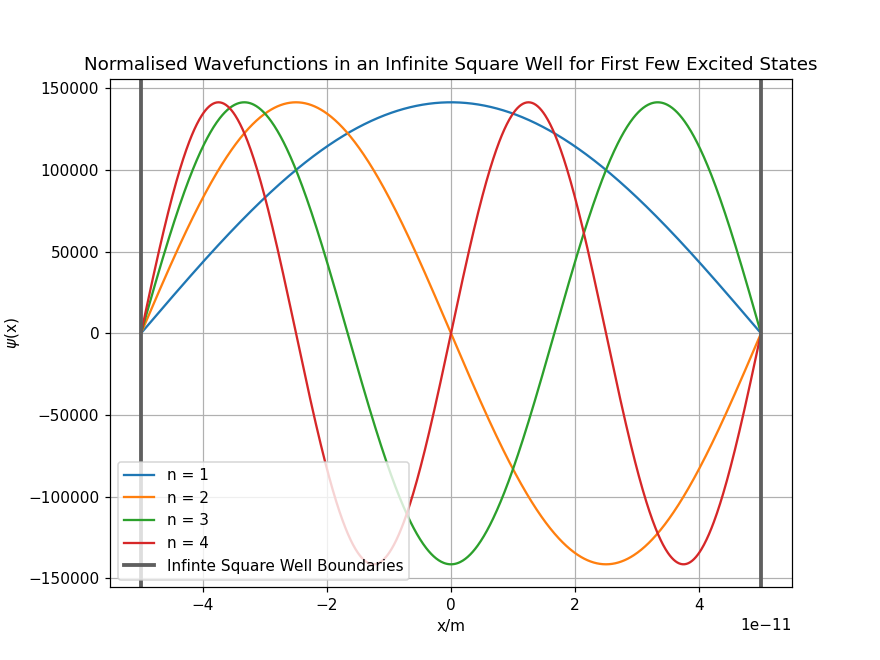

In [35]:
#plot wavefunctions for states n = 2,3,4:

min_n = 1 #the minimum n of wavefunction that we want to display
max_n = 4 #the maximum n of wavefunction that we want to display

plt.figure(figsize=(8,6))
for i in range(min_n,max_n+1):
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,V)[i-1], V)) #code the numerical wavefunctions
    plt.plot(xplotpoints, wavefunction, label="n = {}".format(i)) #numerical plots

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label="Infinte Square Well Boundaries")
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels and more:
plt.title('Normalised Wavefunctions in an Infinite Square Well for First Few Excited States')
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.legend(loc='best')
plt.grid()

plt.show()
#Note: The plots from here on out will take a few seconds to load

### Compare Analytical and Numerical Solutions for First 6 Excited Energy States:

<IPython.core.display.Javascript object>


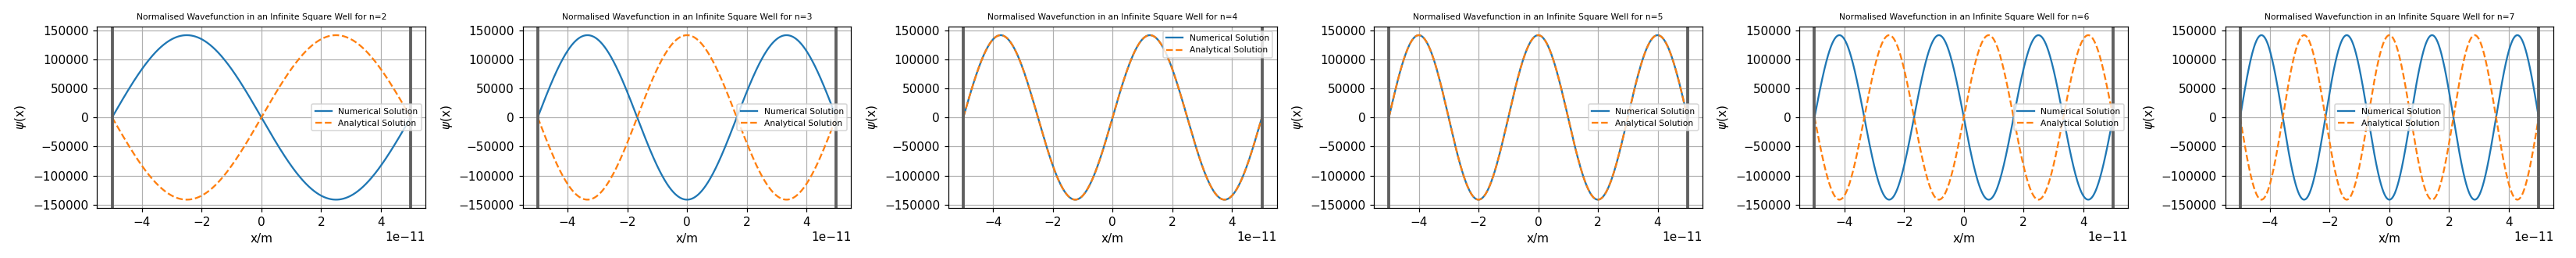

In [36]:
#plot wavefunctions for states n = 2,3,4,5,6:
min_n = 2 #the minimum n of wavefunction that we want to display
max_n = 7 #the maximum n of wavefunction that we want to display


fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,V)[i-1], V))#code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction, label="Numerical Solution") #plot numerical
    axs[i-min_n].plot(xpoints, analytic_wf(i, xpoints),'--', label="Analytical Solution") #plot analytical

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5) #no label here since it takes up too much space
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Wavefunction in an Infinite Square Well for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$\psi$(x)')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()
  


#### Discussion of higher energy state plots:

As you can see, some of the numerical plots are "inverted" (reflected on y=0) when compared to analytical for n=2,3,6,7. You can notice that there is a periodicity of inverted and non-inverted numerical plots. It seems to be that the plots are periodically cycling between inverted and non-inverted. The numerical solution is seemingly differentiating the ground state cosine plot over and over again, the sequence seems as such:

$$
\cos, -\sin, -\cos,\ \sin,\ \cos, -\sin, -\cos,... 
$$

where the negative terms are the "inverted" plots. This is a flaw in this numerical method. However, this particular problem is not of great magnitude since we can square the wavefunction to give the probability density of the electron being at a position $x$. This is what matters since we are concerned with (mainly) probability when considering wavefunctions and probaility density represents the probability of an electron being at a point $x$ within the infinite square well. The plot of the probability densities is shown below:

<IPython.core.display.Javascript object>


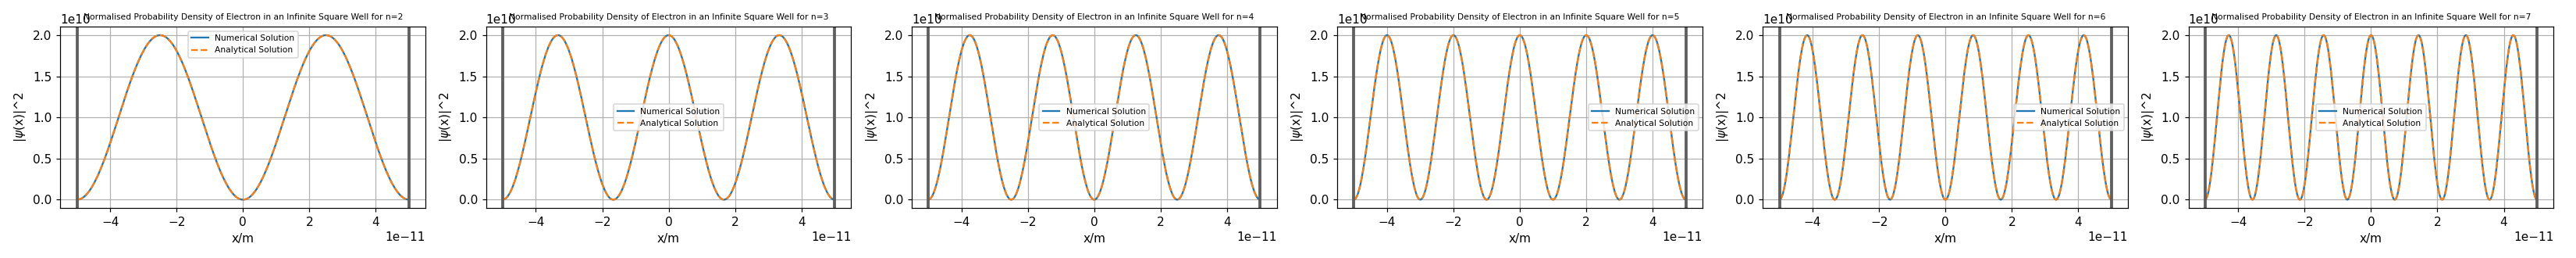

In [37]:
min_n = 2 #the minimum n of prob. density that we want to display
max_n = 7 #the maximum n of prob. density that we want to display


fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,V)[i-1], V))#code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction**2, label="Numerical Solution") #plot numerical SQUARED
    axs[i-min_n].plot(xpoints, analytic_wf(i, xpoints)**2,'--', label="Analytical Solution") #plot analytical SQUARED

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Probability Density of Electron in an Infinite Square Well for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$|\psi$(x)|^2')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

As shown above, the probability densities for both numerical and analytical solutions match up perfectly. This shows that this numerical method is extremely accurate when solving the TISE when ignoring the trivial error of the inverted wavefunctons problem. The problem is trivial since it doesnt make a difference to the desired use of a wavefunction which is measuring probabilities. 

### Plots for 2 Large $n$:

Plot for two $n$ between $18 \leq n \leq 28$: $n=20$ and $n=25$:

<IPython.core.display.Javascript object>


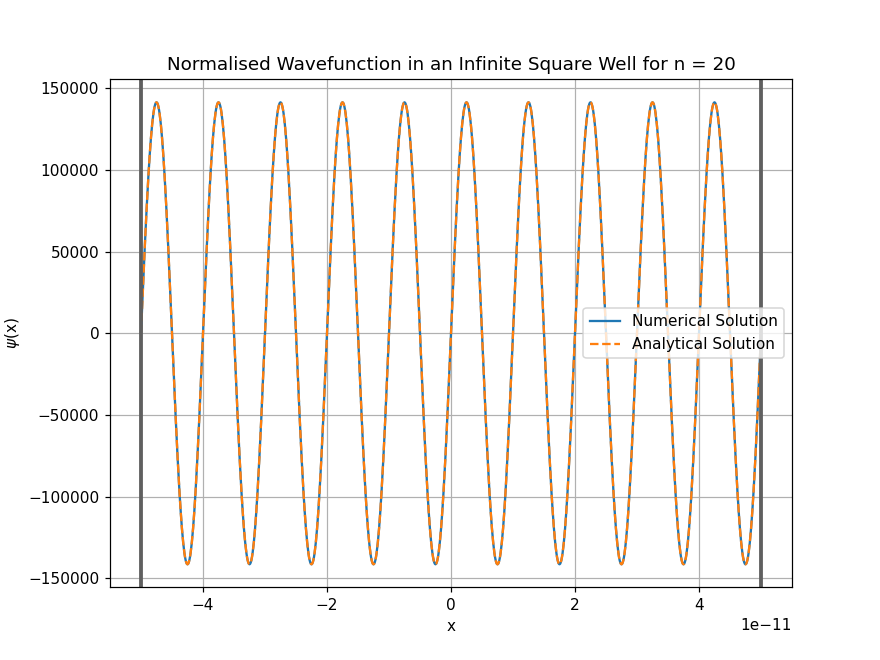

<IPython.core.display.Javascript object>


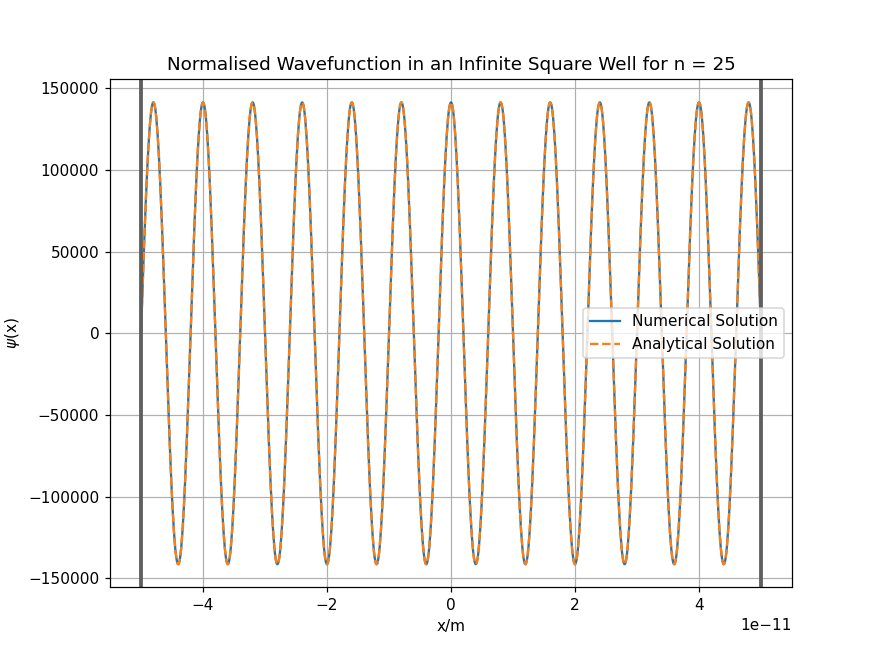

In [38]:
#n=20 plot:
plt.figure(figsize=(8,6))
n1=20 #n value
wavefunction = norm(RungeKutta2d(xpoints, E3_values(n1,V)[n1-1], V)) #numerical wavefunction

plt.plot(xplotpoints, wavefunction, label="Numerical Solution") #numerical plot
plt.plot(xpoints, analytic_wf(n1, xpoints),'--', label="Analytical Solution") #analytical plot

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels and more:
plt.title('Normalised Wavefunction in an Infinite Square Well for n = {}'.format(n1))
plt.xlabel('x')
plt.ylabel('$\psi$(x)')
plt.legend(loc='best')
plt.grid()

plt.show()

#n=25 plot:
plt.figure(figsize=(8,6))
n2=25 #n value
wavefunction = norm(RungeKutta2d(xpoints, E3_values(n2,V)[n2-1], V)) #numerical wavvefunction

plt.plot(xplotpoints, wavefunction, label="Numerical Solution") #numerical plot
plt.plot(xpoints, analytic_wf(n2, xpoints),'--', label="Analytical Solution") #analytical plot

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels and more:
plt.title('Normalised Wavefunction in an Infinite Square Well for n = {}'.format(n2))
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.legend(loc='best')
plt.grid()

plt.show()

As you can see, the numerical solution perfectly matches the analytical solution for large n. Therefore, proving that this numerical method works great for large n.

# Section 2: The Infinite "unsquare" Well

Now, we will plot the wavefunctions in the infinite square well but for different potentials within the well. In other words, we will be placing different potential in the well and calculating the wavefunctions when those potentials are present. Hence, the name infinite "unsqare" well.

## 2.1 Harmonic Potential:

Our first potential will be the harmonic potential which is defined as:

$$
V(x) = V_0 \frac{x^2}{a^2} \ \ (12) \ \ \ \text{as seen in} \ \  [2], [7]
$$

where $V_{0}=700e$.

In [39]:
#define the harmonic potential function:
def Vharm(x):
    '''
    Harmonic Potential function
    Inputs: x
    Returns: harmonic potential for all input x
    
    '''
    V0=700*e
    return V0*((x**2)/(a_value**2)) 

Now, we will plot the wavefunctions for a harmonic potential inside an infinite well for $n = 1, 2, 3, 4$:

<IPython.core.display.Javascript object>


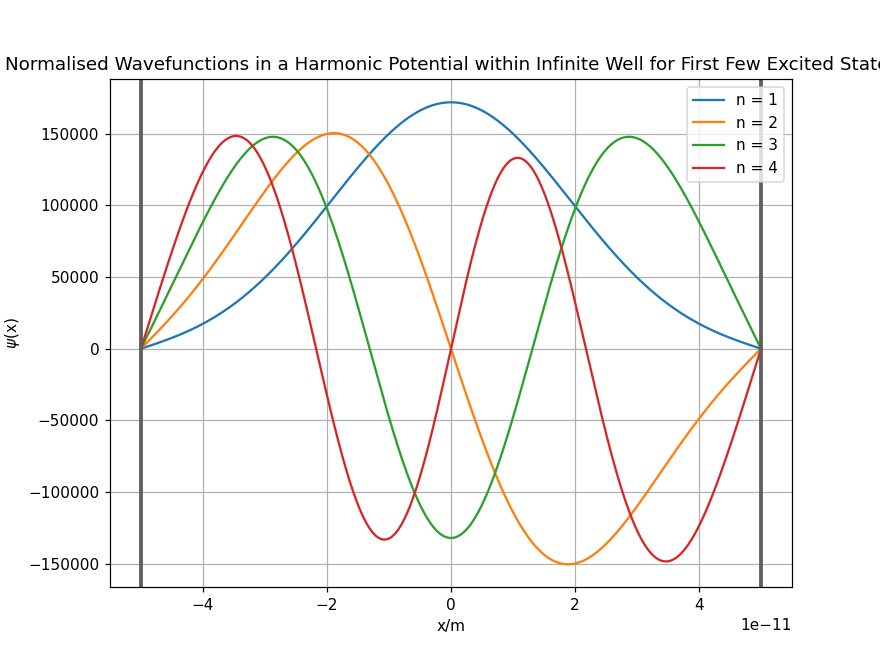

In [40]:
#plot wavefunctions for states n = 1,2,3,4:

min_n = 1 #the minimum n of wavefunction that we want to display
max_n = 4 #the maximum n of wavefunction that we want to display

plt.figure(figsize=(8,6))
for i in range(min_n,max_n+1):
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vharm)[i-1], Vharm)) #replace potential with 'Vharm'
    plt.plot(xplotpoints, wavefunction, label="n = {}".format(i))

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels and more:
plt.title('Normalised Wavefunctions in a Harmonic Potential within Infinite Well for First Few Excited States')
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.legend(loc='best')
plt.grid()

plt.show()

### Calculating Analytical Solution for a Harmonic Potential TISE: 

The eigenfunction (i.e. wavefunction) of the harmonic potential TISE is given by:

$$
\psi_{n}(x)={A_{n} H_{n}}\left(\sqrt{\frac{m \omega_{0}}{\hbar}} x\right) e^{-m \omega_{0} x^{2} / 2 \hbar},\ n=0,1,2,3, \ldots
\ \ (13) \ \ \ \text{as seen in} \ \ [6]$$

where $A_{n}$ is the normalisation constant for a state $n$, $H_{n}$ is the Hermite Polynomials for each $n$ and $\omega_0$ is the angular frequency of the electron and is given by:
$$
\omega_{0} = \sqrt{\frac{2V_{0}}{ma^{2}}}\ \ \ (14) \ \ \ \text{as seen in} \ \ [6]
$$
\
We can code the Hermite poynomicals using `hermite` from the `scipy.special` library. The normalisation constant is given by:

$$
A_{n}=\sqrt{\frac{1}{2^{n} n !}}\left(\frac{\alpha}{\pi}\right)^{1 / 4} \ \ \ (15a) \ \ \ \text{as seen in} \ \ [5]
$$
where:
$$\alpha=1 / \sqrt{\beta}=\sqrt{\frac{k \mu}{\hbar^{2}}} \ \ \ (16) \ \ \ \text{as seen in} \ \ [5]$$

Therefore, $\alpha$ is equivilant to  $\frac{m \omega_{0}}{\hbar}$. Thus we can substitute this into the normalisation constant equation (15):

$$
A_{n}=\sqrt{\frac{1}{2^{n} n !}}\left(\frac{\frac{m \omega_{0}}{\hbar}}{\pi}\right)^{1 / 4} \ \ \ (15b) 
$$

We can code the factorials by importing `factorial` from the `math` library. We will now define a normalisation constant function and a `psi` (wavefunction) function using the equations above:

In [41]:
# Import hermite polynomials and factorial to use in analytical solution:
from scipy.special import hermite
from math import factorial

In [42]:
def Norm_const(n):
    '''Normalization constant
    Inputs: n (energy state)
    Outputs: Normalisation constant for the given input n
    '''
    V0 =700*e
    omega0 = np.sqrt((2*V0)/(m*(a_value**2)))
    
    return (1/np.sqrt((2**n)*factorial(n)))*(((m*omega0)/h_bar)/np.pi)**0.25 #equation 15b

def psi(n, x):
    '''Analytical harmonic potential wavefunction for level n
    Inputs: n (energy state), x (chosen array of x values)
    Outputs: psi (analytical harmonic potential wavefunction) 
    '''
    V0 =700*e
    omega0 = np.sqrt((2*V0)/(m*(a_value**2)))
    Hr=hermite(n)
    
    psi = Norm_const(n)*Hr(x*np.sqrt((m*omega0)/h_bar))*np.exp(-(m*omega0*(x**2))/(2*h_bar))
    
    return psi

### Compare Analytical and Numerical Solutions for First 4 Energy States:

<IPython.core.display.Javascript object>


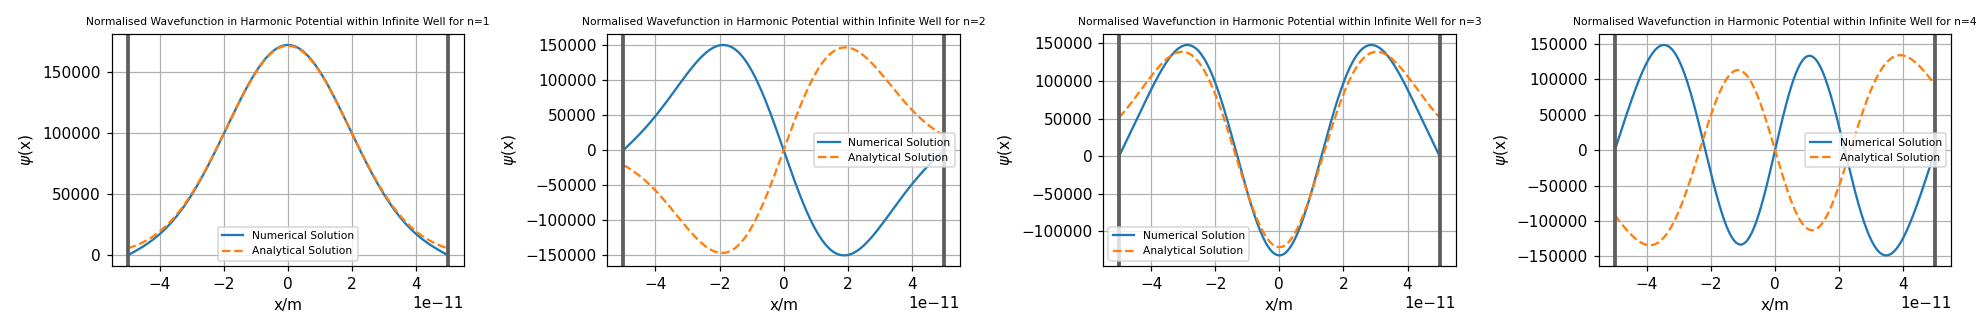

In [43]:
min_n = 1
max_n = 4
fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vharm)[i-1], Vharm))#code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction, label="Numerical Solution") #plot numerical
    #since n starts at 0 for the analytical solution (shown in equation 13), we must take 
    #away 1 from the n input such that it is synchronious with the numerical solution:
    axs[i-min_n].plot(xpoints, psi(i-1, xpoints),'--', label="Analytical Solution") #plot analytic

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Wavefunction in Harmonic Potential within Infinite Well for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$\psi$(x)')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

#### Discussion of plots:

For the Harmonic potential, like the infinte square well potential, the numerical solutions are seemingly differentiating the ground state cosine plot over and over again. However, the analytical solution is behaving differently to the analytical solution of the infinite square well potential. Again, this is a trivial problem since it doesnt make a difference to the desired use of a wavefunction which is measuring probabilities. We can plot the probability density as follows:

<IPython.core.display.Javascript object>


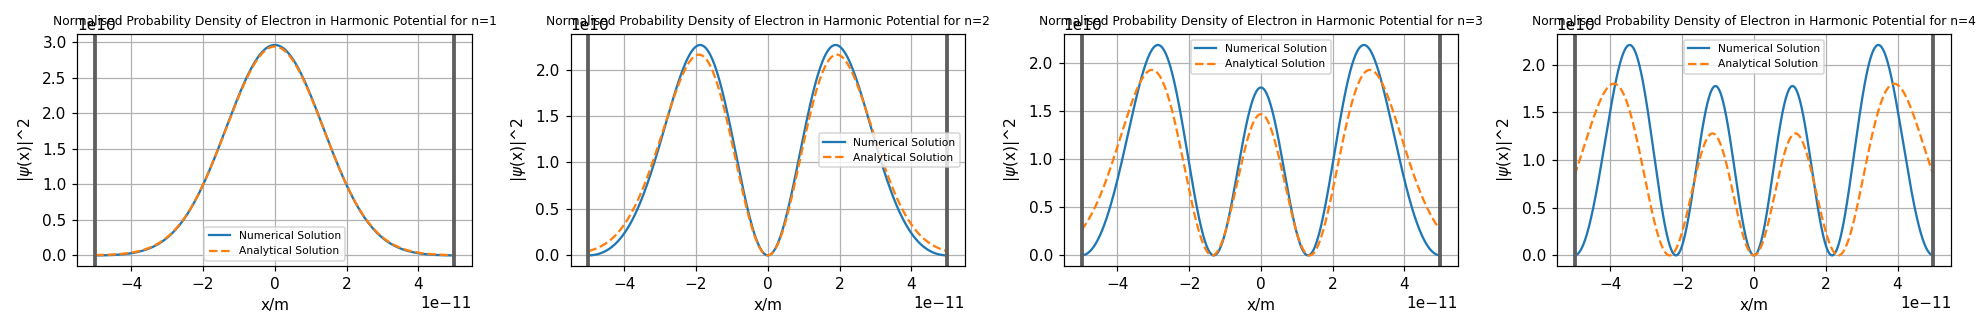

In [44]:
min_n = 1
max_n = 4
fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vharm)[i-1], Vharm))#code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction**2, label="Numerical Solution") #plot numerical SQUARED
    #since n starts at 0 for the analytical soltution (shown in equation 13), we must take 
    #away 1 from the n input such that it is synchronious with the numerical solution:
    axs[i-min_n].plot(xpoints, psi(i-1, xpoints)**2,'--', label="Analytical Solution") #plot analytic SQUARED

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Probability Density of Electron in Harmonic Potential for n={}'.format(i), size=8)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$|\psi$(x)|^2')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

As you can see, the accuracy of the numerical method is decreasing considerably when n increases. This is because the anlytical solution takes into account the effects of quantum tunneling. The numerical solutions does not because it uses the same method for the infinite square well potential ($V=0$ between $-a$ and $a$) which doesn't not have the effect of quantum tunneling since there is no potential to tunnel through within $-a$ and $a$. For the harmonic potential, the electron can tunnel through the potential. The numerical solution doesnt take this into account while the analytical solution does. Quantum tunneling becomes more likley as n increases. The quantum tunneling probability is shown below:

$$
T=\frac{16 E\left(V_{0}-E\right)}{V_{0}^{2}} e^{-2 \kappa a} \ \ \ \text{as seen in} \ \ [6]
$$

where $\kappa=\frac{\sqrt{2 m\left(V_{0}-E\right)}}{\hbar}$. From the equation, you can see that as $E$ increases, the probablility of quantum tunneling increases. The numerical solution does not take this into account. Thus the discrepancy between the analytical and numerical solution increases as energy (or energy level n) increases since probability of quantum tunneling increases as n increases. Also, the analytical wavefunctions end outside the boundaries of the infinite well. This is because we didn't place boundary conditions on the analytical solutions.

### Showing Well and Energy Levels:

We will now show the harmonic potential within the infiite well. Also, the energy levels from $n = 1, 2, 3, 4$ will be shown as horizontal lines. We first have to calculate the energies analytically using:

$$
E=\hbar \omega_{0}\left(n+\frac{1}{2}\right) \ \ \ \text{as seen in} \ \ [6]
$$

We code it as follows:

In [45]:
def E(n):
    '''Eigenvalues (energies) in units of J
    Input: n (energy state)
    Output: energy 
    '''
    #define V0 and omega as before:
    V0 =700*e
    omega0 = np.sqrt((2*V0)/(m*(a_value**2)))
    
    return h_bar*omega0*(n + 0.5) #equation

Plot the harmonic potential along with both the anlytically and numerically solved energies (as horizontal lines):

<IPython.core.display.Javascript object>


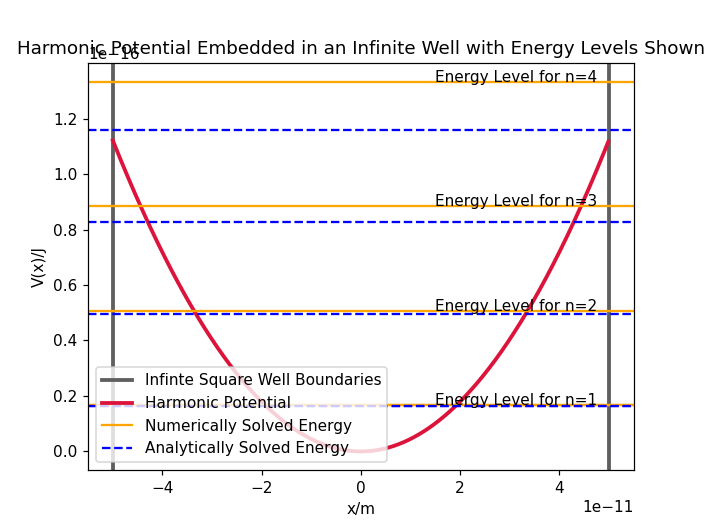

In [46]:
min_n = 1
max_n = 4

plt.figure()

#infite well boundaries:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label='Infinte Square Well Boundaries')
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#harmonic potential
plt.plot(xpoints, Vharm(xpoints), color='crimson', label='Harmonic Potential', lw=2.5)

#plot horizontal lines for each n (representing energy levels):
for i in range(min_n, max_n+1):
    plt.axhline(y = E3_values(max_n, Vharm)[i-1], color='orange') #numerical energies
    plt.text((1.5/5)*a_value,E3_values(max_n, Vharm)[i-1],'Energy Level for n={}'.format(i),rotation=0) #labels for energy levels
    plt.axhline(y = E(i-1),linestyle='--', color='b') #analytical energies

#plot lowest energy level again just to input only one label in legend (since inside for loop will have lables for each n):
plt.axhline(y = E3_values(max_n, Vharm)[min_n-1], color='orange', label="Numerically Solved Energy")
plt.axhline(y = E(min_n-1),linestyle='--', color='b', label="Analytically Solved Energy")
    
#labels and more:
plt.xlabel('x/m')
plt.ylabel('V(x)/J')
plt.title('Harmonic Potential Embedded in an Infinite Well with Energy Levels Shown')
plt.legend(loc="lower left")

plt.show()

The explanation of the difference between numerical an analytical energies is the same as the explanation for the difference between numerical and analytical wavefunctions.

## 2.2 Finite Square Well Potential:

Now we will plot the wavefunctions for a TISE with a finite square potential embedded within an infinte well. In this case, finite square potential is:

$$
V_x = \begin{cases} 0 & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_0  & \text{if } |x| > a/2, \end{cases} \ \ (17) \ \ \ \text{as seen in} \ \ [2], [7]
$$

where $V_{0}=600e$. We can code it using an if and else statement:

In [47]:
def Vfinite(x):
    '''
    Finite square Potential function
    Inputs: x
    Returns: finite square potential for all input x
    
    '''
    V0=600*e

    if abs(x)>(a_value/2):
        return V0
    else:
        return 0.0

Plot for first 4 states:

<IPython.core.display.Javascript object>


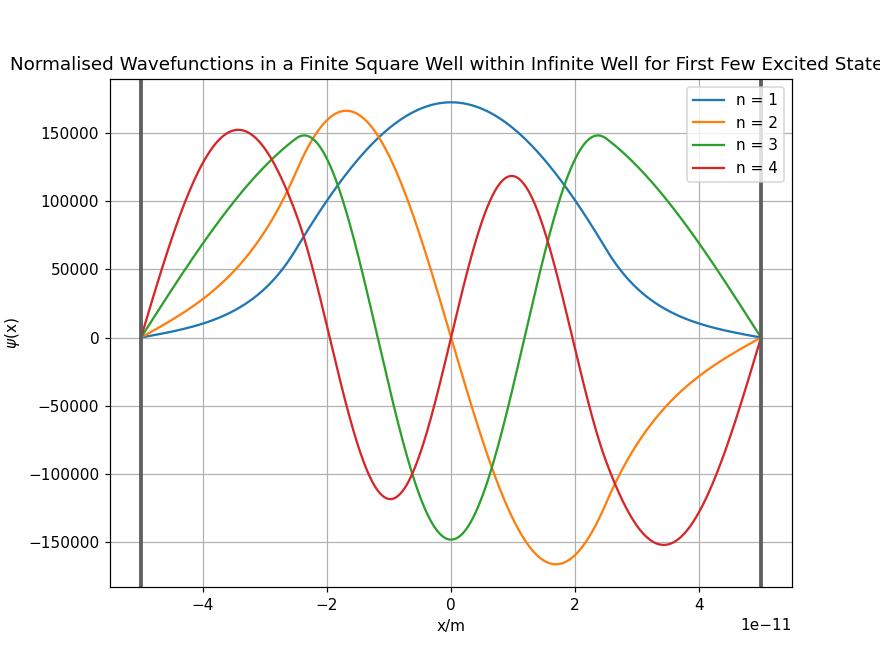

In [48]:
#plot wavefunctions for states n = 1,2,3,4:

min_n = 1 #the minimum n of wavefunction that we want to display
max_n = 4 #the maximum n of wavefunction that we want to display

plt.figure(figsize=(8,6))
for i in range(min_n,max_n+1):
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vfinite)[i-1], Vfinite)) #replace potential with 'Vfinite'
    plt.plot(xplotpoints, wavefunction, label="n = {}".format(i))

#plot 2 lines representing the boundaries of the inifinite square well:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#labels and more:
plt.title('Normalised Wavefunctions in a Finite Square Well within Infinite Well for First Few Excited States')
plt.xlabel('x/m')
plt.ylabel('$\psi$(x)')
plt.legend(loc='best')
plt.grid()

plt.show()

### Calculating Analytical Solution for a Finite Square Potential TISE: 

We can split the Finite Square Well into three reigions; I, II and III

$$
\psi_{1}(x) =C e^{\kappa x}, \ \ x>\frac{a}{2} \ \ (18) \ \ \ \text{as seen in} \ \ [6]\\ 
$$

$$
\psi_{{\mathrm{II}}, n}(x) = 
\begin{cases} \frac{1}{\sqrt{a}} \cos\left(\frac{ n \pi x}{2a}\right) \qquad 
\mathrm{if} \  \ n \ \mathrm{odd}, \\ 
   \frac{1}{\sqrt{a}} \sin\left(\frac{ n \pi x}{2a}\right) \qquad 
   \mathrm{if} \ \ n \ \mathrm{even}, \end{cases} \ \
,-\frac{a}{2}\leq x \leq \frac{a}{2} \ \ (19) \ \ \ \text{as seen in} \ \  [2], [7]
$$

$$
\psi_{\mathrm{III}}(x) =G e^{-\kappa x}, \ \  x<-\frac{a}{2} .\ \ (20)\ \ \ \text{as seen in} \ \ [6]
$$


where $\kappa$ is given by:
$$
\kappa = \frac{n\pi}{2a} \ \ (21) \ \ \ \text{as seen in} \ \ [6]
$$




For this finite square well, the boundary conditions are:
$$
\psi_{\mathrm{l}}\left(-\frac{a}{2}\right) =\psi_{\mathrm{II}}\left(-\frac{a}{2}\right) \ \ (22) \ \ \ \text{as seen in} \ \ [6] \\
\psi_{\mathrm{II}}\left(\frac{a}{2}\right) =\psi_{\mathrm{III}}\left(\frac{a}{2}\right) \ \ (23) \ \ \ \text{as seen in} \ \ [6]
$$

Applying boundary conditions and solving for constants $C$ and $G$:

$$
C = 
\begin{cases} \frac{e^{\frac{n\pi}{4}}}{\sqrt{a}}\cos\left(-\frac{ n \pi}{4}\right) \qquad 
\mathrm{if} \  \ n \ \mathrm{odd}, \\ 
   \frac{e^{\frac{n\pi}{4}}}{\sqrt{a}} \sin\left(-\frac{ n \pi}{4}\right) \qquad 
   \mathrm{if} \ \ n \ \mathrm{even}, \end{cases} \ \ (24)
$$

$$
G = 
\begin{cases} \frac{e^{\frac{n\pi}{4}}}{\sqrt{a}}\cos\left(\frac{n \pi}{4}\right) \qquad 
\mathrm{if} \  \ n \ \mathrm{odd}, \\ 
   \frac{e^{\frac{n\pi}{4}}}{\sqrt{a}} \sin\left(\frac{n \pi}{4}\right) \qquad 
   \mathrm{if} \ \ n \ \mathrm{even}, \end{cases} \ \ (25)
$$

By substituting these constants in to the wavefunction equations above, we can code a function for the wavefunction:

In [49]:
def wavefunction_finite(n,x):
    '''
    "analytical" wavefunction for finite square well within an infinite well
    Inputs: n (energy state), x (chosen array of x values)
    Output: values (values of analytical wavefunction for finite square well for every x-value)
    
    '''
    
    #wf1 = C*np.exp(((n*np.pi)/(2*a_value))*i)  REGION 1 WAVEFUNCTION
    #wf2 = analytic_wf(n,i)                     REGION 2 WAVEFUNCTION
    #wf3 = G*np.exp(-((n*np.pi)/(2*a_value))*i) REGION 3 WAVEFUNCTION
    
    C_odd = (np.exp((n*np.pi)/4)/np.sqrt(a_value))*np.cos(-(n*np.pi)/4)
    C_even = (np.exp((n*np.pi)/4)/np.sqrt(a_value))*np.sin(-(n*np.pi)/4)
              
    G_odd = (np.exp((n*np.pi)/4)/np.sqrt(a_value))*np.cos((n*np.pi)/4)
    G_even = (np.exp((n*np.pi)/4)/np.sqrt(a_value))*np.sin((n*np.pi)/4)
    
    #use a multiple if, else and elif statements for each of the conditions in the equations above:
    values = []
    for i in x:
        if i<(-a_value/2):
            if (n%2) == 0: 
                wf1 = C_even*np.exp(((n*np.pi)/(2*a_value))*i)
                values.append(wf1)
            else:
                wf1 = C_odd*np.exp(((n*np.pi)/(2*a_value))*i)
                values.append(wf1)
          
        
        elif i>=(-a_value/2) and i<=(a_value/2):
            wf2 = analytic_wf(n,i)
            values.append(wf2)
         
        
        elif i>(a_value/2):
            if (n%2) == 0: 
                wf3= G_even*np.exp(-((n*np.pi)/(2*a_value))*i)
                values.append(wf3)
            else:
                wf3 = G_odd*np.exp(-((n*np.pi)/(2*a_value))*i)
                values.append(wf3)
    
    return values   

### Compare "Analytical" and Numerical Solutions for First 4 Energy States:

<IPython.core.display.Javascript object>


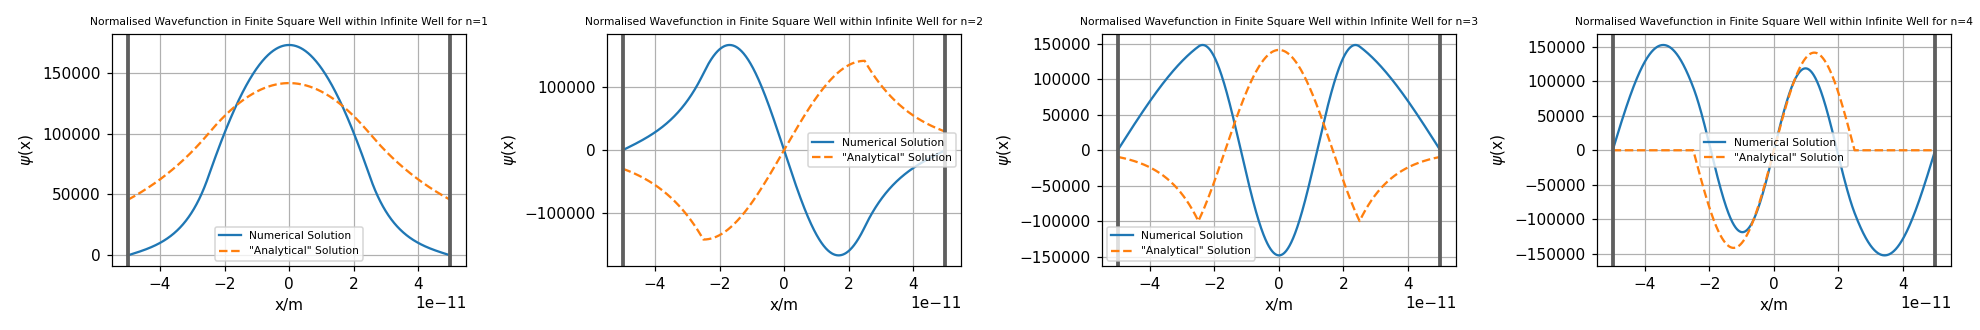

In [50]:
min_n = 1
max_n = 4

fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vfinite)[i-1], Vfinite)) #code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction, label="Numerical Solution") #plot numerical
    axs[i-min_n].plot(xpoints, wavefunction_finite(i,xpoints),'--', label='"Analytical" Solution')#plot analytical 

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Wavefunction in Finite Square Well within Infinite Well for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$\psi$(x)')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

#### Discussion of plots:

For this potential, like the infinte square well potential, the numerical solutions are seemingly differentiating the ground state cosine plot over and over again. So, for the reasons stated before, we need to plot the probability densities: 

<IPython.core.display.Javascript object>


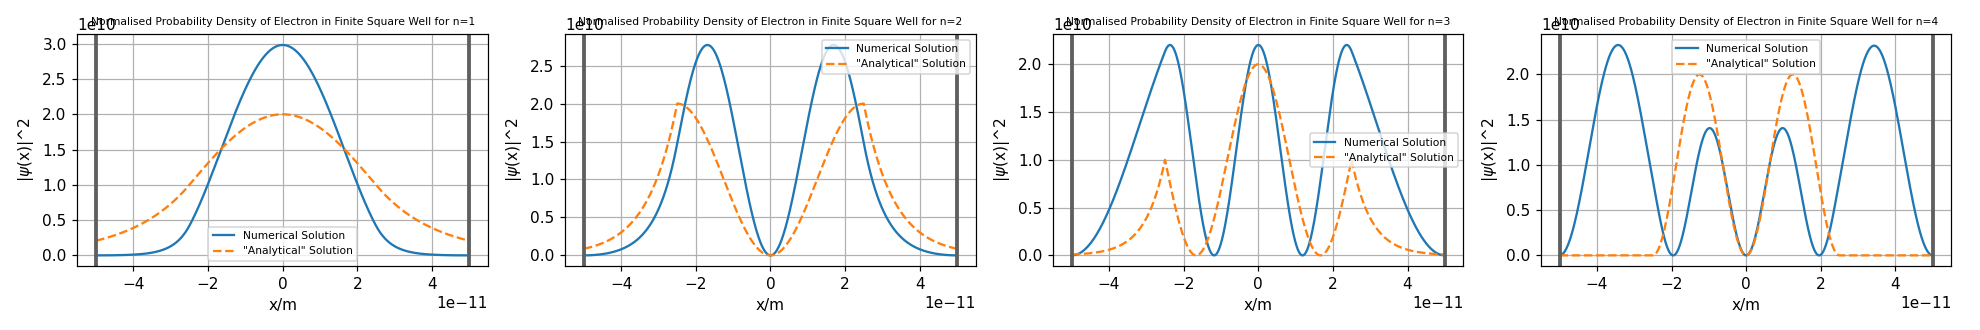

In [51]:
min_n = 1
max_n = 4

fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vfinite)[i-1], Vfinite)) #code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, wavefunction**2, label="Numerical Solution") #plot numerical SQUARED
    axs[i-min_n].plot(xpoints, np.array(wavefunction_finite(i,xpoints))**2,'--', label='"Analytical" Solution')#plot analytical SQUARED

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Probability Density of Electron in Finite Square Well for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$|\psi$(x)|^2')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

The numerical and "analytical" solutions heavily disagree. The "analytical" solution is not truly analytical since there is no true analytical solution available. This is because the finite square well is not a continuous potential; there is an instantaneous change of constant potential at $-a/2$ and $a/2$. However, the general pattern of the wavefunctions match with what is expected since it is similar to the solution of the inifinte square well (infinte square well and finite square well have similar solutions). Also, this "analytical" solution is still a good general comparison. We can see that the numerical and "analytical" solution have a similar shape and pattern of their wavefunctions for each n.  Therefore, we can say that the numerical solution is accurate for a finite square well potential.

### Showing Well and Energy Levels:

Again, we will show the finite square potential within the infiite well. Also, the energy levels from $n = 1, 2, 3, 4$ will be shown as horizontal lines (only numerically solved energy levels since true analytical energy solutions are not available):

<IPython.core.display.Javascript object>


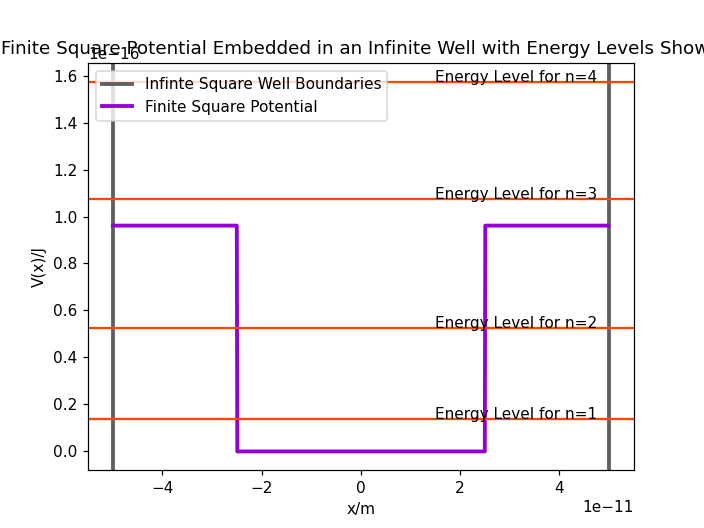

In [52]:
min_n = 1
max_n = 4

plt.figure()

#infite well boundaries:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label='Infinte Square Well Boundaries')
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#finite square potential:
finite=[]
for i in xpoints:
    finite.append(Vfinite(i))
plt.plot(xpoints, finite, color='darkviolet', label='Finite Square Potential', lw=2.5)

#plot horizontal lines for each n (representing energy levels):
for i in range(min_n, max_n+1):
    plt.axhline(y = E3_values(max_n, Vfinite)[i-1], color='orangered')
    plt.text((1.5/5)*a_value,E3_values(max_n, Vfinite)[i-1],'Energy Level for n={}'.format(i),rotation=0) #labels for energy levels

#labels and more:
plt.xlabel('x/m')
plt.ylabel('V(x)/J')
plt.title('Finite Square Potential Embedded in an Infinite Well with Energy Levels Shown')
plt.legend(loc="upper left")

plt.show()

## 2.3 Choice of  Potential: 
$$
V_x = \begin{cases} V_1 \frac{x^2}{a^2} & \text{if } -a/2 \leq x \leq +a/2, \\ 
    V_2  & \text{if } |x| > a/2, \end{cases} \ \ (26) 
$$

where $V_{1}=400e$ and $V_{2}=500e$

In [54]:
#code this potential:
def Vchoice(x):
    '''
    Own Choice of Potential function
    Inputs: x
    Returns: potential for all input x
    
    '''
    V1=400*e
    V2=500*e

    if abs(x)>(a_value/2):
        return V2
    else:
        return V1*((x**2)/((a_value/2)**2))

#### Why this potential?

This potential was chosen because I wanted to combine the harmonic and finite square potential. This potential is interesting because we haven't seen how an electron would behave in a potential that is a "Finite Harmonic Well". It is also interesting because there is no true analytical solution available since the potential is not continous and has boundaries (i.e. it switches potentials at $-a/2$ and $a/2$). 

<IPython.core.display.Javascript object>


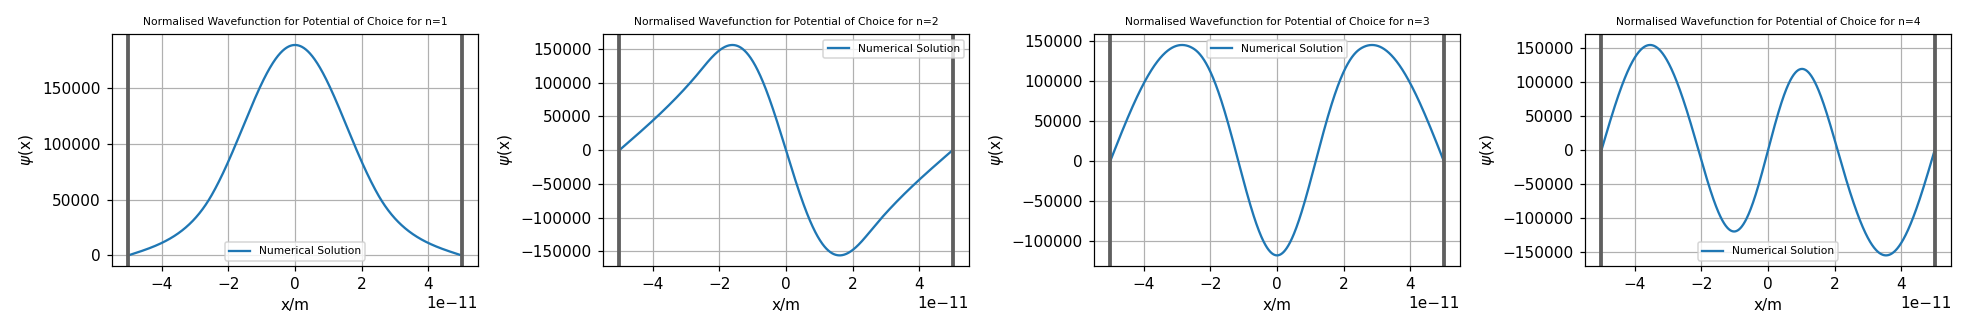

In [55]:
min_n = 1
max_n = 4

fig, axs = plt.subplots(1, (max_n-min_n)+1, figsize=(6*(max_n-min_n),3)) #to have plots for each n side-by-side

for i in range(min_n,max_n+1):
    fig.tight_layout() #to spread out plots so they're not tight
    
    wavefunction = norm(RungeKutta2d(xpoints, E3_values(i,Vchoice)[i-1], Vchoice)) #code the numerical wavefunction
        
    axs[i-min_n].plot(xplotpoints, np.array(wavefunction), label="Numerical Solution") #plot the numerical

    #plot 2 lines representing the boundaries of the inifinite square well:
    axs[i-min_n].axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5)
    axs[i-min_n].axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)
    
    #labels:
    axs[i-min_n].set_title('Normalised Wavefunction for Potential of Choice for n={}'.format(i), size=7)
    axs[i-min_n].set_xlabel('x/m')
    axs[i-min_n].set_ylabel('$\psi$(x)')
    axs[i-min_n].legend(loc='best', prop={'size': 7}) #'prop' to adjust size of legend
    axs[i-min_n].grid()

plt.show()

### Showing Well and Energy Levels:

Again, we will show this potential within the infiite well. Also, the energy levels from $n = 1, 2, 3, 4$ will be shown as horizontal lines:

<IPython.core.display.Javascript object>


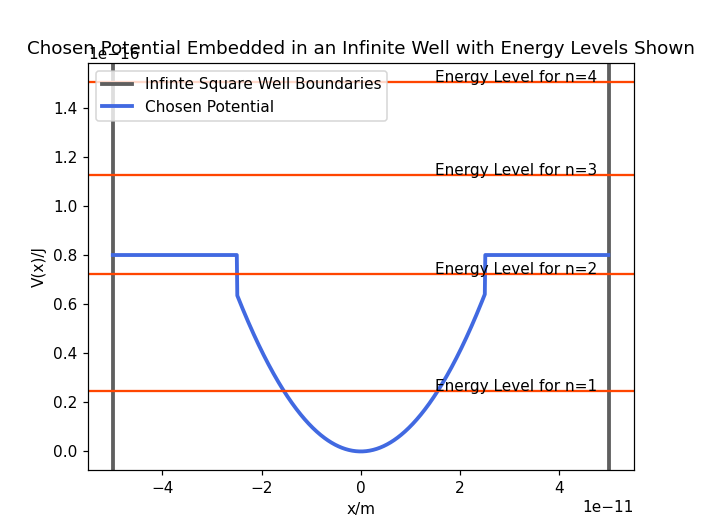

In [56]:
min_n = 1
max_n = 4

plt.figure()

#infite well boundaries:
plt.axvline(x=-a,c='#5f5f5f',ls='-',lw=2.5, label='Infinte Square Well Boundaries')
plt.axvline(x=a,c='#5f5f5f',ls='-',lw=2.5)

#potential:
finite=[]
for i in xpoints:
    finite.append(Vchoice(i))
plt.plot(xpoints, finite, color='royalblue', label='Chosen Potential', lw=2.5)

#plot horizontal lines for each n (representing energy levels):
for i in range(min_n, max_n+1):
    plt.axhline(y = E3_values(max_n, Vchoice)[i-1], color='orangered')
    plt.text((1.5/5)*a_value,E3_values(max_n, Vchoice)[i-1],'Energy Level for n={}'.format(i),rotation=0) #labels for energy levels

#labels and more:
plt.xlabel('x/m')
plt.ylabel('V(x)/J')
plt.title('Chosen Potential Embedded in an Infinite Well with Energy Levels Shown')
plt.legend(loc="upper left")

plt.show()

# Bibliography

[1]  Dash, L. 2021. _" PHAS0029 Session 8 Finding roots, and boundary value problems"_. \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766 \[accessed 9th March 2021\]

[2]  Dash, L. 2021. _" Supplementary notebook for the Final Assignment"_. \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/course/view.php?id=6766 \[accessed 9th March 2021\] 

[3]  Benjamin Obi Tayo 2019. _"Finite Difference Solution of the Schrodinger Equation"_. \[Online\] Available from https://medium.com/modern-physics/finite-difference-solution-of-the-schrodinger-equation-c49039d161a8 \[accessed 11th March 2021\]

[4]  Arvin Kushwaha 2021. _"How to Solve for Eigenstates: The Time-Independent Schrödinger Equation"_. \[Online\] Available from https://hackernoon.com/how-to-solve-for-eigenstates-a-time-independent-schrodinger-equation-5q1h34on \[accessed 15th March 2021\]

[5]  David M. Hanson, Erica Harvey, Robert Sweeney, Theresa Julia Zielinski 2020. _"Quantum States of Atoms and Molecules"_. \[Online\] Available from https://chem.libretexts.org/Courses/Pacific_Union_College/Quantum_Chemistry/05%3A_The_Harmonic_Oscillator_and_the_Rigid_Rotor/5.06%3A_The_Harmonic-Oscillator_Wavefunctions_involve_Hermite_Polynomials \[accessed 19th March 2021\]

[6]  Prof. Steven Schofield 2020. _"Section 4 One-dimensional time-independent problems"_. \[Online\] UCL Moodle resource Available from https://moodle.ucl.ac.uk/pluginfile.php/3486461/mod_resource/content/2/PHAS0022-2020-21-Section_4.pdf \[accessed 21st March 2021\]

[7]  Dash, L. 2021. _" PHAS0029 Final Assignment 2021: The infinite "unsquare" potential"_. \[Online\] UCL Moodle resource. Available from   https://moodle.ucl.ac.uk/pluginfile.php/3937467/mod_resource/content/1/PHAS0029FinalAssignment2021.pdf \[accessed 9th March 2021\]

[8] 19013880. 2021. _" 19013880 - Finding the ground state energy"_. 